In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from scipy.stats import pearsonr, linregress
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('challenge_data.csv')
print(df.shape)
df.head()

(473034, 333)


,id,BOA0001,BOA0002,BOA0003,BOA0004,BOA0005,BOA0006,BOA0007,BOA0008,BOA0009,...,BOA0323,BOA0324,BOA0325,BOA0326,BOA0327,BOA0328,BOA0329,BOA0330,BOA0331,BOA0332
0,cg20742840,0.778198,0.823700,0.813192,0.978039,0.930804,0.600430,0.658129,0.758819,0.818009,...,0.932865,0.942532,0.940135,0.893520,0.913233,0.885451,0.969773,0.873466,0.905788,0.885525
1,cg07053114,0.346179,0.423043,0.323272,0.456227,0.388786,0.243582,0.381214,0.295038,0.354865,...,0.306441,0.280379,0.771940,0.514432,0.218487,0.298960,0.193430,0.565576,0.246822,0.338265
2,cg14308509,0.888106,0.813231,0.901700,0.854781,0.835503,0.888371,0.819399,0.838860,0.876856,...,0.846503,0.856401,0.926911,0.887406,0.868394,0.834295,0.854356,0.882374,0.845492,0.852243
3,cg19688837,0.668552,0.683577,0.717308,0.695337,0.552037,0.708501,0.651459,0.701599,0.700440,...,0.585042,0.716976,0.804471,0.733976,0.638391,0.761994,0.711961,0.649954,0.730940,0.736962
4,cg22503354,0.067323,0.127976,0.065217,0.081517,0.104635,0.079741,0.111995,0.133007,0.082126,...,0.062164,0.052686,0.124904,0.066052,0.062875,0.073818,0.071134,0.065073,0.054883,0.059619


In [3]:
# Illumina probe to gene mappingfiles
#df_map_full = pd.read_csv('MethylationEPIC v2.0 Files/EPIC-8v2-0_A2.csv', skiprows=7, sep=',', low_memory=False) # https://support.illumina.com/content/dam/illumina-support/documents/downloads/productfiles/methylationepic/InfiniumMethylationEPICv2.0ProductFiles(ZIPFormat).zip
#df_map = pd.read_csv('EPICv2.hg38.manifest.gencode.v41.tsv.gz', sep='\t', compression='gzip') # https://epicom.biomedcentral.com/articles/10.1186/s43682-023-00021-5#availability-of-data-and-materials
# df_map_clean = df_map_full.loc[df_map_full['Name'].isin(df['id'].values),:]
# ilmnid2name = df_map_clean.set_index('IlmnID').loc[:,'Name'].to_dict()
# ilmnid2gene = df_map.set_index('probeID').loc[:,'genesUniq'].to_dict()
# ilmnid2gene = df_map.set_index('probeID').loc[:,'genesUniq'].to_dict()
# name2ilmnid = df_map_clean.set_index('Name').loc[:,'IlmnID'].to_dict()
# genes = df['id'].map(name2ilmnid).map(ilmnid2gene).dropna().values
# df_map[df_map.genesUniq=='ZZZ3']['probeID'].map(ilmnID2name).dropna().values # duplicate probes per gene
# array(['cg01341891', 'cg01485247', 'cg02490994', 'cg02988267',
#       'cg04127303', 'cg04718055', 'cg05029193', 'cg05776075',
#       'cg10895547', 'cg17033546', 'cg17224732', 'cg17864040',
#       'cg22221847', 'cg22600394', 'cg24577193', 'cg24762437',
#       'cg26534213'], dtype=object)
# index2gene = df[['id']].map(name2ilmnid).map(ilmnid2gene)

In [4]:
# df[(df.iloc[:, 1:].mean(axis=1)/df.iloc[:, 1:].std(axis=1)) >100] #select CpG by coef of variation. Nope doesnt work, fishes data that jumps around too much
# df[(df.iloc[:,1:].max(axis=1)-df.iloc[:,1:].min(axis=1))>1.0085] # select by min-max range above threshold. Same as previous
# df[(df.iloc[:,1:].quantile(.85, axis=1)-df.iloc[:,1:].quantile(.15, axis=1)) >0.9] # select by qunatiles # better but still selects noisy data. 

# need to smooth, then filter?

In [5]:
# smooth data across individuals using lowess, then calculate min-max range, then get above threshold
#frac=0.5
#it=1
#rows=df.shape[0]

#row_list=df.iloc[:rows, 0][df.iloc[:rows, 1:].apply(lambda x: np.ptp(sm.nonparametric.lowess(x, range(332), frac=frac, it=it, return_sorted=True)[:,1]), axis=1)>0.25]
# 10590     cg00573770
#25990     cg11792281
#51520     cg11807280
#62668     cg23479922
#72481     cg02872426
#103353    cg02711724
#114048    cg16867657
#156919    cg18826637
#168080    cg11057824
#183149    cg15894389
#192747    cg05404236
#208988    cg27436995
#226390    cg24892069
#234192    cg19283806
#251950    cg12934382
#255073    cg01620164
#260036    cg05305893
#290084    cg08993878
#296031    cg19344626
#341269    cg07686394
#359857    cg11141652
#370741    cg22943590
#394806    cg11847992
#398188    cg10501210
#431487    cg23744638
#441094    cg22454769
#448001    cg04875128
#467958    cg08128734

# takes too long

In [6]:
df.set_index('id', inplace=True)

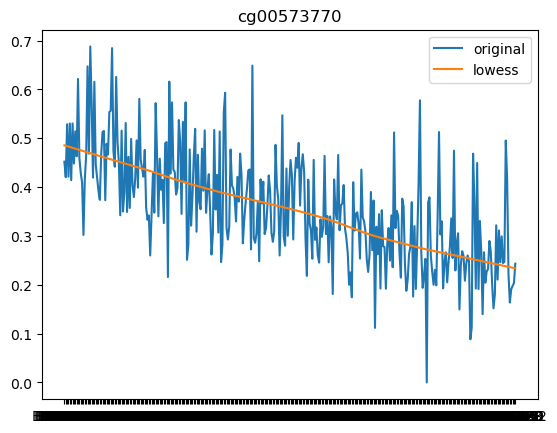

In [7]:
name='cg00573770'
frac=0.4
it=1

plt.plot(df.loc[df.index == name, 'BOA0001':'BOA0332'].T, label='original')
plt.plot(df.loc[df.index == name, 'BOA0001':'BOA0332']\
         .apply(lambda x: sm.nonparametric.lowess(x, range(332), frac=frac, it=it)[:,1], axis=1, ).values[0], label='lowess')
plt.legend()
plt.title(f'{name}')
plt.show()

### impute values

In [8]:
print(f'{df.isna().sum().sum()/ (df.shape[0]*df.shape[1]) *100}% missing values in df')

1.2819457283464837% missing values in df


In [9]:
imputer = SimpleImputer()
df_imp = pd.DataFrame(imputer.fit_transform(df.T).T, columns=df.columns, index=df.index) # sklearn takes mean over columns, so need to transpose

In [10]:
# fit linear regression to each cpg x num patients, find those where both slope and rho above threshold
# slopes = df_imp.apply(lambda x: linregress(range(332), x.values.reshape(-1)).slope, axis=1)
bools = df_imp.apply(lambda x: #[True for val in linregress(range(332), x.values.reshape(-1))[:4:2] if abs(val)>0.0006], axis=1)
             all(
                 [True if abs(val[0]) > val[1] else False for val in zip(linregress(range(332), x.values.reshape(-1))[:4:2], [0.0006, 0.6])]
             ), axis=1)

In [11]:
df_imp[bools].index

Index(['cg00573770', 'cg03738025', 'cg11807280', 'cg09124496', 'cg02872426',
       'cg24079702', 'cg10616795', 'cg06639320', 'cg16867657', 'cg17804348',
       'cg09809672', 'cg18826637', 'cg20249566', 'cg15894389', 'cg19991948',
       'cg24892069', 'cg19283806', 'cg12934382', 'cg24724428', 'cg11693709',
       'cg01542019', 'cg19344626', 'cg12899747', 'cg08468401', 'cg00329615',
       'cg11847992', 'cg10501210', 'cg23744638', 'cg22454769', 'cg04875128',
       'cg07553761', 'cg05338066', 'cg08128734', 'cg23186333'],
      dtype='object', name='id')

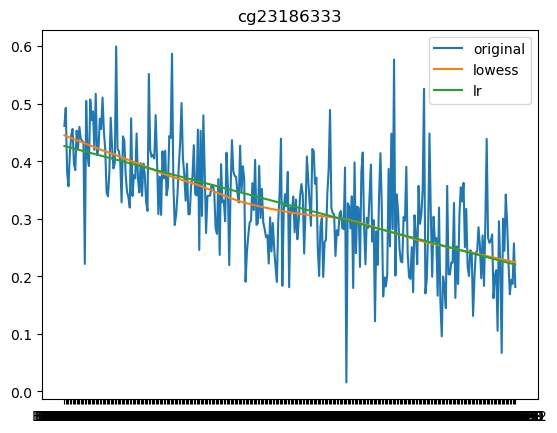

In [12]:
name='cg23186333'
frac=0.4
it=1

plt.plot(df_imp.loc[df_imp.index == name, 'BOA0001':'BOA0332'].T, label='original')
plt.plot(df_imp.loc[df_imp.index == name, 'BOA0001':'BOA0332']\
         .apply(lambda x: sm.nonparametric.lowess(x, range(332), frac=frac, it=it)[:,1], axis=1, ).values[0], label='lowess')
lr=linregress(range(332), df_imp.loc[df_imp.index == name, 'BOA0001':'BOA0332'].values.reshape(-1))
plt.plot(lr.intercept + lr.slope*range(332), label='lr')
plt.legend()
plt.title(f'{name}')
plt.show()

### heatmaps of correlations

<Axes: >

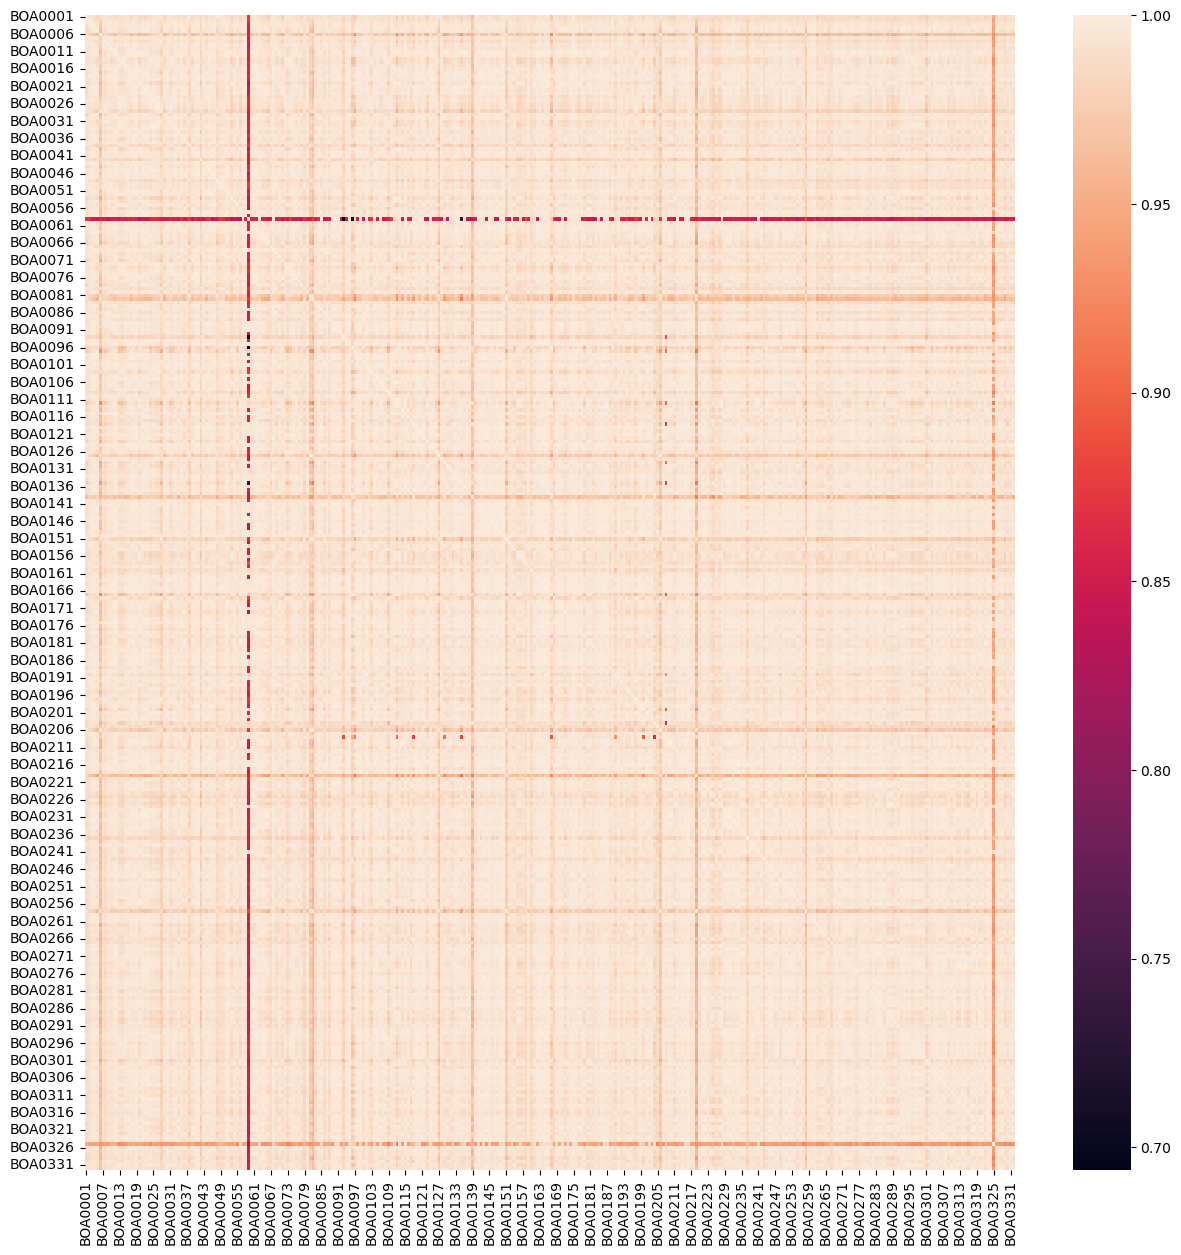

In [143]:
plt.subplots(figsize=(15,15))

sns.heatmap(df.loc[df.id.isin(df_map[df_map.genesUniq=='ZZZ3']['probeID'].map(ilmnID2name).dropna().values),'BOA0001':'BOA0332'].corr())

In [149]:
df.loc[df.id.isin(df_map[df_map.genesUniq=='ZZZ3']['probeID'].map(ilmnID2name).dropna().values),'BOA0055':'BOA0061'].corr()

,BOA0055,BOA0056,BOA0057,BOA0058,BOA0059,BOA0060,BOA0061
BOA0055,1.000000,0.986766,0.994245,0.991989,0.845488,0.992352,0.995947
BOA0056,0.986766,1.000000,0.994078,0.995499,0.830962,0.989177,0.991887
BOA0057,0.994245,0.994078,1.000000,0.996700,0.996835,0.993932,0.995573
BOA0058,0.991989,0.995499,0.996700,1.000000,0.855068,0.990327,0.994390
BOA0059,0.845488,0.830962,0.996835,0.855068,1.000000,0.855920,0.861287
BOA0060,0.992352,0.989177,0.993932,0.990327,0.855920,1.000000,0.997286
BOA0061,0.995947,0.991887,0.995573,0.994390,0.861287,0.997286,1.000000


<Axes: >

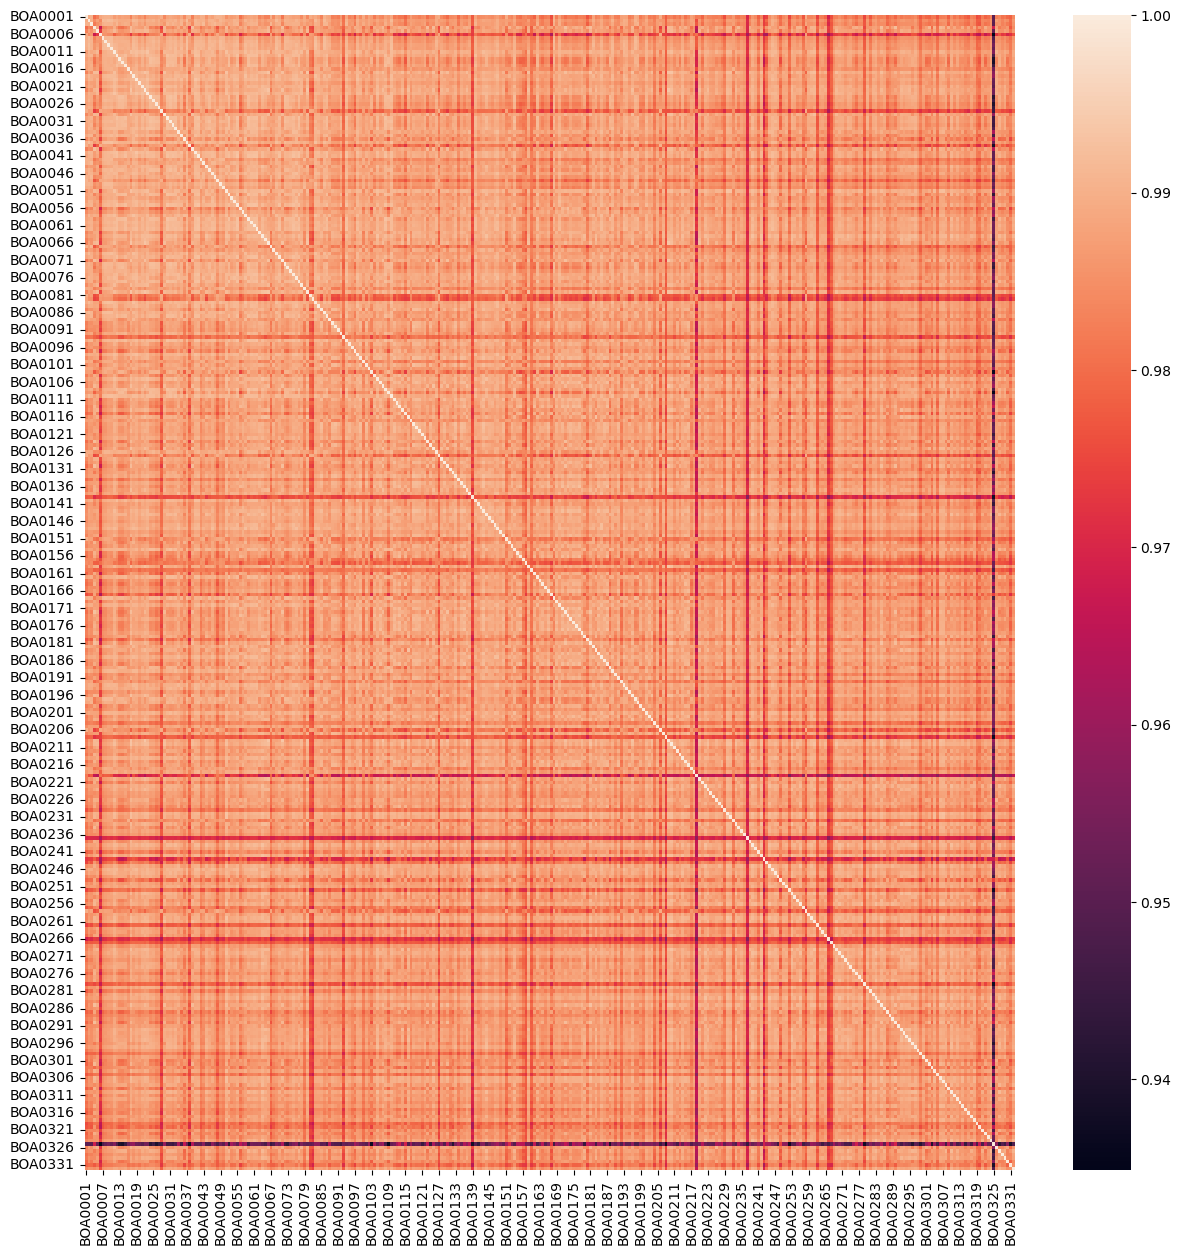

In [154]:
plt.subplots(figsize=(15,15))

sns.heatmap(df.iloc[:, 1:].corr())